In [29]:
import pandas as pd
import os
from tabulate import tabulate
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rc('axes',edgecolor='r')


In [3]:
caminho_pacientes = os.path.join("dataset", "HSL_Agosto", "final", "HSL_Pacientes_2.csv")
caminho_exames = os.path.join("dataset", "HSL_Agosto", "final", "HSL_Exames_2.csv")
caminho_desfecho = os.path.join("dataset", "HSL_Agosto", "final", "HSL_Desfechos_2.csv")

pacientes = pd.read_csv(caminho_pacientes, sep="|")
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO
0,3487791F44C34B421C932DC8616A8437,M,1963,BR,SP,MMMM,CCCC
1,0AD1FFA4419472256666A3445414F1F9,M,1969,BR,SP,SAO PAULO,CCCC
2,BE35D08CF3EF6F114E9935F6D72C49FA,M,1964,BR,SP,SAO PAULO,CCCC
3,962F4020D456AAB602B356E57238EF42,F,1959,BR,SP,SAO PAULO,CCCC
4,F983089DAC62E42124227C856AE3444C,M,1947,BR,SP,MMMM,CCCC


In [17]:
exames = pd.read_csv(caminho_exames, sep="|", usecols=['ID_PACIENTE','DE_ANALITO', 'DE_RESULTADO'] )
exames.head()

,ID_PACIENTE,DE_ANALITO,DE_RESULTADO
0,3487791F44C34B421C932DC8616A8437,Fosfatase Alcalina,106
1,3487791F44C34B421C932DC8616A8437,Gama-GT,33
2,3487791F44C34B421C932DC8616A8437,ALT (TGP),51
3,3487791F44C34B421C932DC8616A8437,DHL,530
4,3487791F44C34B421C932DC8616A8437,Proteína C-Reativa,"1,84"


In [5]:
desfechos = pd.read_csv(caminho_desfecho, sep="|")
desfechos.head()


,id_paciente,id_atendimento,dt_atendimento,de_tipo_atendimento,id_clinica,de_clinica,dt_desfecho,de_desfecho
0,3487791F44C34B421C932DC8616A8437,33277D918111011E48FABCD6FC09012B,2020-07-08,Pronto Atendimento,6,Ortopedia,2020-07-08,Alta médica melhorado
1,3487791F44C34B421C932DC8616A8437,2DF164AD7E51B0A2F52B6DB58F904A22,2020-05-08,Externo,20,Procedimentos,2020-05-08,Alta Administrativa
2,3487791F44C34B421C932DC8616A8437,11676CFEEF6A4CDD49B0A74D3F3A85EC,2020-05-25,Externo,20,Procedimentos,2020-05-25,Alta Administrativa
3,0AD1FFA4419472256666A3445414F1F9,70A834FEFF3562FCBA3888D592DA2609,2020-03-16,Externo,20,Procedimentos,2020-03-16,Alta Administrativa
4,3487791F44C34B421C932DC8616A8437,A3F017D035922D728E06B744511A6797,2020-05-11,Pronto Atendimento,42,CL Médica Síndromes Virais,2020-05-11,Alta médica melhorado


In [6]:
desfechos.de_desfecho.value_counts()

Alta Administrativa                                                 11087
Alta médica melhorado                                                5063
Alta a pedido                                                         149
Desistência do atendimento                                            137
Alta médica Inalterado                                                 53
Óbito após 48hs de internação sem necrópsia                            42
Alta médica curado                                                     33
Alta por abandono                                                      13
Transferência Inter-Hospitalar Externa - Serviço de Ambulância          8
Óbito nas primeiras 48hs de internação sem necrópsia não agônico        3
Assistência Domiciliar                                                  3
Transferência Inter-Hospitalar Externa - Transporte Próprio             1
Name: de_desfecho, dtype: int64

In [7]:
exames.head()

,ID_PACIENTE,DE_ANALITO,DE_RESULTADO
0,3487791F44C34B421C932DC8616A8437,Fosfatase Alcalina,106
1,3487791F44C34B421C932DC8616A8437,Gama-GT,33
2,3487791F44C34B421C932DC8616A8437,ALT (TGP),51
3,3487791F44C34B421C932DC8616A8437,DHL,530
4,3487791F44C34B421C932DC8616A8437,Proteína C-Reativa,"1,84"


In [18]:
exames = pd.pivot_table(exames, index="ID_PACIENTE", columns="DE_ANALITO", values="DE_RESULTADO", aggfunc='sum')

In [20]:
exames

DE_ANALITO,17-Alfa-Hidroxiprog.,183,25OH-Vitamina D Total,ACTH,ALT (TGP),ANCA,"ANTI-Xa, atividade",AST (TGO),Adenovírus,AgHBe,...,pO2 venoso,v.Willebrand,Ácido Valpróico,"Ácido ascorbico, plasma",Ácido fólico,"Ácido metilmalonico, soro",Ácido Úrico,"Ácido Úrico, urina",Ésteres de Carnitina (EC),Índice de Green & King
ID_PACIENTE,,,,,,,,,,,,,,,,,,,,,
003051C9B19101D1C10C5DC654384017,NaN,NaN,NaN,NaN,27,NaN,NaN,18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003F1F4C194763E4A00FD809AF5FA6AA,NaN,62,NaN,NaN,7929,NaN,NaN,7627,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007D8341B5ACFE2638807598AD434475,NaN,NaN,NaN,NaN,32,NaN,NaN,20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00C9B7FC14DE031AB88636B449665E27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00E5069B6CF10EFA7AFC44546042E07A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FF0502DBA392B04131B299C5435E1AC8,NaN,NaN,NaN,NaN,3127,NaN,NaN,3229,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FF25935FC05F3A1BF59F069E331A9472,NaN,NaN,NaN,NaN,58,NaN,NaN,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFABB233208E1E66DDC025BC5CC2E4D2,NaN,NaN,NaN,NaN,1824,NaN,NaN,1927,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


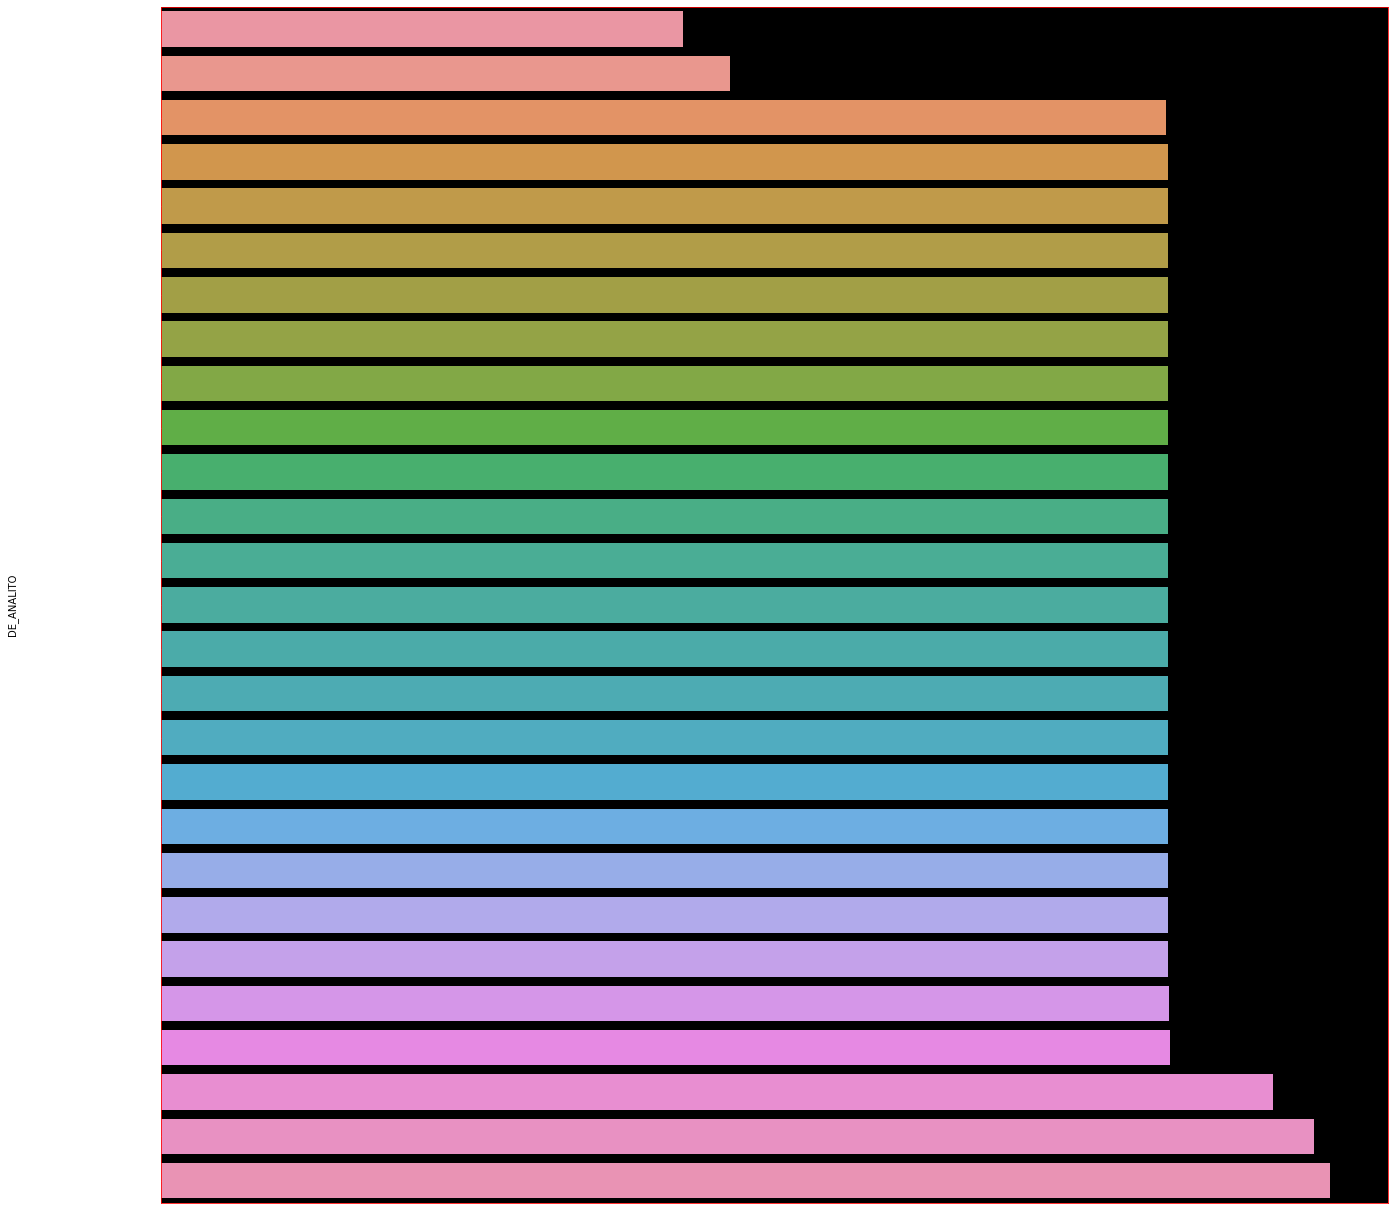

In [34]:
dados_faltantes = exames.isna().mean().sort_values(ascending=True)
dados_faltantes = dados_faltantes[dados_faltantes < 0.6]
plt.figure(figsize=(22,22))
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
sns.barplot(x=dados_faltantes, y=dados_faltantes.index);

In [40]:
exames[list(dados_faltantes.index)]

DE_ANALITO,Coronavírus (2019-nCoV),Material (2019-nCoV),Plaquetas,RDW,Linfócitos (%),Leucócitos,Monócitos,Monócitos (%),"Morfologia, SVE",Hematócrito,...,Basófilos,Basófilos (%),CHCM,Eritrócitos,HCM,"Morfologia, SB",Volume plaquetário médio,Creatinina,Uréia,Proteína C-Reativa
ID_PACIENTE,,,,,,,,,,,,,,,,,,,,,
003051C9B19101D1C10C5DC654384017,NaN,NaN,231000338000,"14,413,9","42,932,8",32405480,250400,"7,77,3",normaisnormais,"41,645,3",...,1020,"0,30,4","33,433,6","4,975,52","28,027,5",não foram observados caracteres tóxico-degener...,"10,410,2","0,970,971,011,01",1626,"0,080,06"
003F1F4C194763E4A00FD809AF5FA6AA,DETECTADO,swab de nasofaringe,212000487000197000477000365000416000416000174000,"12,912,513,412,312,512,412,212,6","17,627,133,519,48,717,216,213,7",54607650762065008770586070809040,350750690510540370570380,"6,49,89,17,86,26,38,14,2",normaisnormaisnormaisnormaisnormaisComo não há...,"42,543,444,540,339,340,840,646,9",...,103020202002020,"0,20,40,30,30,20,00,30,2","33,432,932,133,333,633,133,333,9","4,634,764,874,494,344,564,525,22","30,730,029,429,830,429,629,930,5",não foram observados caracteres tóxico-degener...,"10,210,511,110,19,910,010,010,5","0,950,950,840,840,810,811,001,00",25232527,"14,090,370,042,3510,828,774,16inferior a 0,03"
007D8341B5ACFE2638807598AD434475,DETECTADO (POSITIVO),swab de nasofaringe,193000,"12,9","22,0",4500,230,"5,1",normais,"42,4",...,0,"0,0","34,0","5,07","28,4",não foram observados caracteres tóxico-degener...,"10,7","1,12",29,"0,95"
00C9B7FC14DE031AB88636B449665E27,DETECTADO (POSITIVO),swab de nasofaringe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00E5069B6CF10EFA7AFC44546042E07A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FF0502DBA392B04131B299C5435E1AC8,DETECTADO,swab de nasofaringe,296000258000244000,"12,212,212,4","14,59,811,1",525058205790,600540690,"11,49,311,9",normaisnormaisnormais,"43,546,544,1",...,102020,"0,20,30,3","33,334,634,2","5,245,595,24","27,728,828,8",não foram observados caracteres tóxico-degener...,"9,19,39,3","1,151,151,091,09",2827,"2,151,552,25"
FF25935FC05F3A1BF59F069E331A9472,NaN,NaN,250000,"12,2","21,8",6870,600,"8,7",normais,"50,2",...,30,"0,4","34,1","5,79","29,5",não foram observados caracteres tóxico-degener...,"9,3","0,970,97",26,"0,15"
FFABB233208E1E66DDC025BC5CC2E4D2,DETECTADO,swab de nasofaringe,260000255000370000,"12,111,611,5","42,840,334,5",619060009230,360470670,"5,87,87,3",normaisnormaisnormais,"43,539,741,9",...,702040,"1,10,30,4","34,734,334,4","5,104,714,90","29,628,929,4",não foram observados caracteres tóxico-degener...,"9,99,59,3","1,191,191,061,06",5343,"0,134,541,56"


In [41]:
exames.shape

(1679, 615)

In [42]:
pacientes.shape

(4273, 7)